In [23]:
import VariationalBayes as vb
import VariationalBayes.ExponentialFamilies as ef
import VariationalBayes.Modeling as modeling

import autograd
import autograd.numpy as np
import autograd.numpy.random as npr
import autograd.scipy as sp
import scipy as osp
import numpy as onp

import copy
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
dim1 = 5
dim2 = 10
k = 3

vb_params = vb.ModelParamsDict('vb params')
vb_params.push_param(vb.VectorParam(name='beta', size=k))
vb_params.push_param(vb.UVNMomentParamArray(name='theta1', shape=(dim1, )))
vb_params.push_param(vb.UVNMomentParamArray(name='theta2', shape=(dim2, )))


(array([  99.,  120.,  157.,  145.,   94.,  110.,   41.,   55.,   46.,   15.]),
 array([ 0.09963754,  0.16740508,  0.23517262,  0.30294015,  0.37070769,
         0.43847523,  0.50624277,  0.5740103 ,  0.64177784,  0.70954538,
         0.77731292]),
 <a list of 10 Patch objects>)

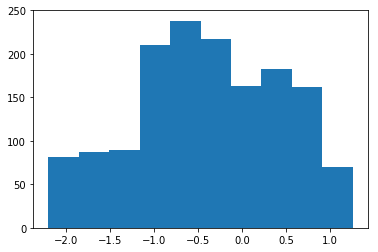

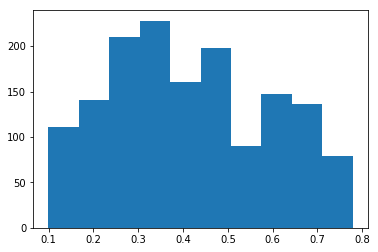

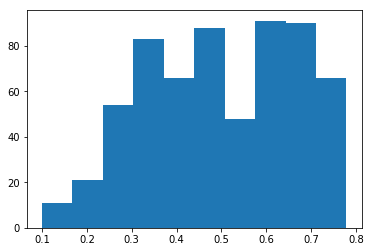

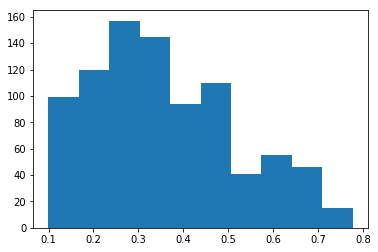

In [59]:
# Generate true data.
true_params = vb.ModelParamsDict('true params')
true_params.push_param(vb.VectorParam('beta', size=k))
true_params.push_param(vb.VectorParam(name='theta_mean', size=2))
true_params.push_param(vb.VectorParam(name='theta_sd', size=2))

true_params.push_param(vb.VectorParam(name='theta1', size=dim1))
true_params.push_param(vb.VectorParam(name='theta2', size=dim2))

theta_mean = np.array([-0.5, 0.5])
theta_sd = np.array([0.8, 0.6])
true_params['theta1'].set(np.random.normal(loc=theta_mean[0], scale=theta_sd[0], size=dim1))
true_params['theta2'].set(np.random.normal(loc=theta_mean[1], scale=theta_sd[1], size=dim2))

true_params['theta_mean'].set(theta_mean)
true_params['theta_sd'].set(theta_sd)

beta = np.random.random(k) - 0.5
true_params['beta'].set(beta)

# Number of observations per combination.

n_obs_per_combo = 30

id1_tile = np.tile(np.expand_dims(np.arange(dim1, dtype='int'), 1), (1, dim2))
id2_tile = np.tile(np.arange(dim2, dtype='int'), (dim1, 1))

yg1 = np.repeat(id1_tile.flatten(), n_obs_per_combo)
yg2 = np.repeat(id2_tile.flatten(), n_obs_per_combo)
n_obs = len(yg1)

data = dict()
data['x'] = 0.2 * (np.random.random((n_obs, k)) - 0.5)
data['yg1'] = yg1
data['yg2'] = yg2

def calculate_logit_means(data, params):
    return np.matmul(data['x'], params['beta'].get()) + \
           params['theta1'].get()[data['yg1']] + \
           params['theta2'].get()[data['yg2']]

def calculate_means(data, params):
    e_mean = np.exp(calculate_logit_means(data, params)) 
    return e_mean / (1 + e_mean)

y_logit_means = calculate_logit_means(data, true_params)
y_means = calculate_means(data, true_params)
y = np.random.binomial(1, y_means)
#plt.plot(y_means, y, 'ko')

plt.figure()
plt.hist(y_logit_means)
plt.figure()
plt.hist(y_means)
plt.figure()
plt.hist(y_means[y == 1])
plt.figure()
plt.hist(y_means[y == 0])